## Observations and Insights

1. The Drugs namely 'Capomulin' and "Ramicane' had the most data points meaning study was conducted with more mice subjected to these drugs.

2. The male mice gender comprises of the 50.6% of the 250 mice under study. 

3. It is evident from the quartile calculations that the tumor size in the mice tested with Capomulin Drug has significantly reduced over the period of the 45 days. It is also evident that even the upper range outliers have small tumor volume as compared to Ramicane, Infobulin and Ceftamin. 

4. As the tumor volume increases ,the weight increases and as the tumor volume decreases, thus the weight decreases showing a positive correlation. This is also evident from the correlation factor of 0.87 as calculated. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mice_data =pd.DataFrame(mouse_metadata)

study_data =pd.DataFrame(study_results)

combined_test_data = pd.merge(mice_data, study_data, how='outer')

combined_test_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_value = combined_test_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_value = combined_test_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_value = combined_test_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_value = combined_test_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_value = combined_test_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean":mean_value,
                             "Median":median_value,
                             "Variance":variance_value,
                             "Standard Deviation":std_value,
                             "SEM":sem_value})
summary_stats.head(200)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

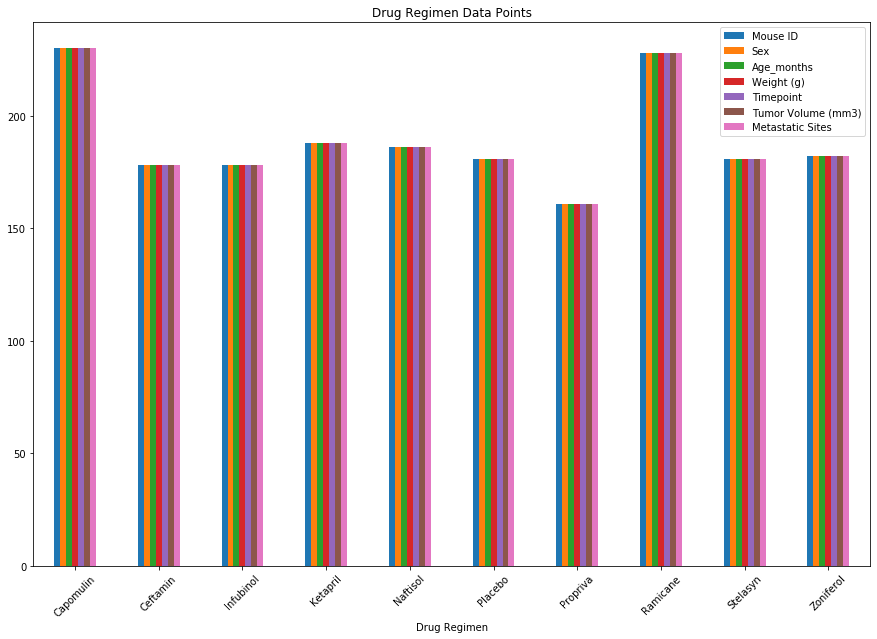

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugregimen_data = combined_test_data.groupby("Drug Regimen").count()

#grouping by drug regimen, getting the count and generating the bar chart.
drugregimen_data.plot(kind='bar', figsize=(15,10), rot=45)

plt.title("Drug Regimen Data Points")
plt.show()

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugregimens = summary_stats.index.tolist()

drugregimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [15]:
#getting the mouse count by grouping by the drug regimen and converting to list for plotting.
drugregimen_count = combined_test_data.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
drugregimen_count


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0.5, 1.0, 'Drug Regimen Data Points')

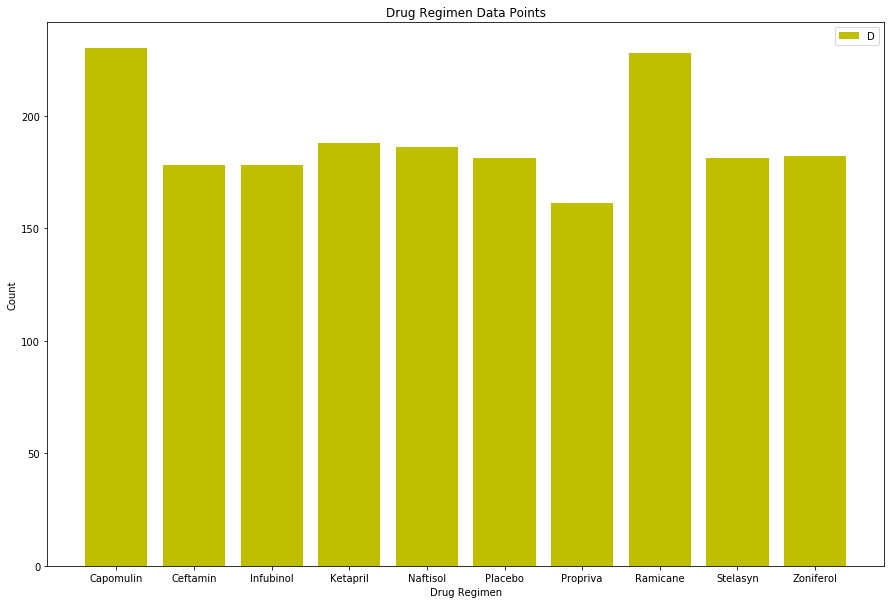

In [16]:
#getting the length of the count list.
x_axis = np.arange(len(drugregimen_count))
x_axis=drugregimens

#plotting the bar chart.
plt.figure(figsize =(15,10))
plt.bar(x_axis, drugregimen_count, color="y", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.legend("Data")
plt.title("Drug Regimen Data Points")

## Pie plots

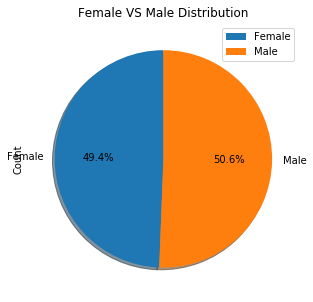

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#grouping my sex and getting the count. 
mice_gender_dist = pd.DataFrame(combined_test_data.groupby(["Sex"])["Mouse ID"].count())

mice_gender_dist = mice_gender_dist.rename(columns={"Mouse ID":"Count"})
mice_gender_dist.head()

#setting and generating the pie chart. 
labels =["Female","Male"]

mice_gender_dist.plot(kind='pie',y = "Count", figsize=(5,5),labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90, title ="Female VS Male Distribution")

[935, 958]


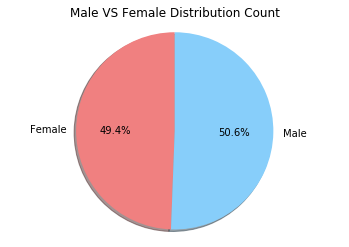

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#calculating the count for each gender and converting the count to list. 
Count = mice_gender_dist["Count"].tolist()
print(Count)

#converting the index which is gender value Male, Female to list. 
gender = mice_gender_dist.index.tolist()
gender

#generating the pie plot 
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0)

plt.title("Male VS Female Distribution Count")
plt.pie(Count, explode=explode, labels=gender,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Capomulin Tumor Volume Data

#Filtering just the Capomulin Drug Data
capomulin_data = combined_test_data.loc[combined_test_data["Drug Regimen"]=="Capomulin",:]

grouped_capomulin_data = capomulin_data.groupby(["Mouse ID"])
#calculating final tumor volume which is at the max timepoint for a given drug.

max_capomulin_data = grouped_capomulin_data["Timepoint"].max()

#creating a new Data Frame.
cap_data = pd.DataFrame(max_capomulin_data)

#Merging Capomulin final volume from max() into main Data Frame. 
capomulin_final_data = pd.merge(cap_data, capomulin_data, how="left")

#Sorting the data frame by Tumor Volume in Asceding fashion.
capomulin_tumor_data = capomulin_final_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()

capomulin_tumor_data.head(200)

,index,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,45,s185,Capomulin,Female,3,17,23.343598,1
1,342,45,s185,Capomulin,Female,3,17,23.343598,1
2,107,45,s185,Capomulin,Female,3,17,23.343598,1
3,514,45,s185,Capomulin,Female,3,17,23.343598,1
4,405,45,s185,Capomulin,Female,3,17,23.343598,1
...,...,...,...,...,...,...,...,...,...
195,393,45,w914,Capomulin,Male,24,21,36.041047,2
196,523,45,w914,Capomulin,Male,24,21,36.041047,2
197,414,45,w914,Capomulin,Male,24,21,36.041047,2
198,351,45,w914,Capomulin,Male,24,21,36.041047,2


In [147]:
#Capomulin Quartile Calculations for Tumor Volume. 

capomulin_tumor = capomulin_tumor_data["Tumor Volume (mm3)"]

capomulin_quartile = capomulin_tumor.quantile([0.25, 0.5,0.75])
capomulin_upperquartile = capomulin_quartile[0.75]
capomulin_lowerquartile = capomulin_quartile[0.25]
capomulin_iqr = capomulin_upperquartile-capomulin_lowerquartile

capomulin_quartile_data =pd.DataFrame({"Quartile":(capomulin_quartile)})

capomulin_quartile_data.head()

capomulin_outliers_lower = capomulin_lowerquartile - (1.5*capomulin_iqr)
capomulin_outliers_upper = capomulin_upperquartile + (1.5*capomulin_iqr)

capomulin_quartile_range =pd.DataFrame({"Upper Quartile":(capomulin_upperquartile),
                                       "Lower Quartile":(capomulin_lowerquartile),
                                       "Inter Quartile":(capomulin_iqr),
                                       "Lower Outlier":(capomulin_outliers_lower),
                                       "Upper Outlier":(capomulin_outliers_upper)},
                                       index=[0])

capomulin_quartile_range.head()

,Upper Quartile,Lower Quartile,Inter Quartile,Lower Outlier,Upper Outlier
0,40.722503,33.329098,7.393405,22.23899,51.812611


In [148]:
#Filtering just the Ramicane Drug Data
ramicane_data = combined_test_data.loc[combined_test_data["Drug Regimen"]=="Ramicane",:]

grouped_ramicane_data = ramicane_data.groupby(["Mouse ID"])
#calculating final tumor volume which is at the max timepoint for a given drug.

max_ramicane_data = grouped_ramicane_data["Timepoint"].max()

#creating a new Data Frame.
ram_data = pd.DataFrame(max_ramicane_data)

#Merging Ramicane final volume from max() into main Data Frame. 
ramicane_final_data = pd.merge(ram_data, ramicane_data, how="left")

#Sorting the data frame by Tumor Volume in Asceding fashion.
ramicane_tumor_data = ramicane_final_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()

ramicane_tumor_data.head(200)

,index,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,45,k403,Ramicane,Male,21,16,22.050126,1
1,40,45,k403,Ramicane,Male,21,16,22.050126,1
2,60,45,k403,Ramicane,Male,21,16,22.050126,1
3,427,45,k403,Ramicane,Male,21,16,22.050126,1
4,103,45,k403,Ramicane,Male,21,16,22.050126,1
...,...,...,...,...,...,...,...,...,...
195,436,45,i177,Ramicane,Male,10,18,33.562402,3
196,172,45,i177,Ramicane,Male,10,18,33.562402,3
197,292,45,i177,Ramicane,Male,10,18,33.562402,3
198,132,45,i177,Ramicane,Male,10,18,33.562402,3


In [149]:
#Ramicane Quartile Calculations

ramicane_tumor = ramicane_tumor_data["Tumor Volume (mm3)"]

ramicane_quartile = ramicane_tumor.quantile([0.25, 0.5,0.75])
ramicane_upperquartile = ramicane_quartile[0.75]
ramicane_lowerquartile = ramicane_quartile[0.25]
ramicane_iqr = ramicane_upperquartile-ramicane_lowerquartile

ramicane_quartile_data =pd.DataFrame({"Quartile":(ramicane_quartile)})

ramicane_quartile_data.head()

ramicane_outliers_lower = ramicane_lowerquartile - (1.5*ramicane_iqr)
ramicane_outliers_upper = ramicane_upperquartile + (1.5*ramicane_iqr)

ramicane_quartile_range =pd.DataFrame({"Upper Quartile":(ramicane_upperquartile),
                                       "Lower Quartile":(ramicane_lowerquartile),
                                       "Inter Quartile":(ramicane_iqr),
                                       "Lower Outlier":(ramicane_outliers_lower),
                                       "Upper Outlier":(ramicane_outliers_upper)},
                                       index=[0])

ramicane_quartile_range.head()

,Upper Quartile,Lower Quartile,Inter Quartile,Lower Outlier,Upper Outlier
0,40.659006,31.56047,9.098537,17.912664,54.306811


In [150]:
#Filtering just the Infubinol Drug Data
infubinol_data = combined_test_data.loc[combined_test_data["Drug Regimen"]=="Infubinol",:]

grouped_infubinol_data = infubinol_data.groupby(["Mouse ID"])
#calculating final tumor volume which is at the max timepoint for a given drug.

max_infubinol_data = grouped_infubinol_data["Timepoint"].max()

#creating a new Data Frame.
inf_data = pd.DataFrame(max_infubinol_data)

#Merging Ramicane final volume from max() into main Data Frame. 
infubinol_final_data = pd.merge(inf_data, infubinol_data, how="left")

#Sorting the data frame by Tumor Volume in Asceding fashion.
infubinol_tumor_data = infubinol_final_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()

infubinol_tumor_data.head(200)

,index,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,203,5,c326,Infubinol,Female,18,25,36.321346,0
1,58,5,c326,Infubinol,Female,18,25,36.321346,0
2,149,5,c326,Infubinol,Female,18,25,36.321346,0
3,263,5,c326,Infubinol,Female,18,25,36.321346,0
4,264,5,c895,Infubinol,Female,7,29,45.477544,0
...,...,...,...,...,...,...,...,...,...
195,34,30,z581,Infubinol,Female,24,25,56.286750,2
196,360,30,z581,Infubinol,Female,24,25,56.286750,2
197,137,35,f345,Infubinol,Male,23,26,56.523327,1
198,191,35,f345,Infubinol,Male,23,26,56.523327,1


In [151]:
#Infubinol Quartile Calculations

infubinol_tumor = infubinol_tumor_data["Tumor Volume (mm3)"]

infubinol_quartile = infubinol_tumor.quantile([0.25, 0.5,0.75])
infubinol_upperquartile = infubinol_quartile[0.75]
infubinol_lowerquartile = infubinol_quartile[0.25]
infubinol_iqr = infubinol_upperquartile-infubinol_lowerquartile

infubinol_quartile_data =pd.DataFrame({"Quartile":(infubinol_quartile)})

infubinol_quartile_data.head()

infubinol_outliers_lower = infubinol_lowerquartile - (1.5*infubinol_iqr)
infubinol_outliers_upper = infubinol_upperquartile + (1.5*infubinol_iqr)

infubinol_quartile_range =pd.DataFrame({"Upper Quartile":(infubinol_upperquartile),
                                       "Lower Quartile":(infubinol_lowerquartile),
                                       "Inter Quartile":(infubinol_iqr),
                                       "Lower Outlier":(infubinol_outliers_lower),
                                       "Upper Outlier":(infubinol_outliers_upper)},
                                       index=[0])

infubinol_quartile_range.head()

,Upper Quartile,Lower Quartile,Inter Quartile,Lower Outlier,Upper Outlier
0,61.215841,48.753112,12.462728,30.059019,79.909933


In [152]:
#Filtering just the Ceftamin Drug Data
ceftamin_data = combined_test_data.loc[combined_test_data["Drug Regimen"]=="Ceftamin",:]

grouped_ceftamin_data = ceftamin_data.groupby(["Mouse ID"])

#calculating final tumor volume which is at the max timepoint for a given drug.
max_ceftamin_data = grouped_ceftamin_data["Timepoint"].max()

#creating a new Data Frame.
cef_data = pd.DataFrame(max_ceftamin_data)

#Merging Ramicane final volume from max() into main Data Frame. 
ceftamin_final_data = pd.merge(cef_data, ceftamin_data, how="left")

#Sorting the data frame by Tumor Volume in Asceding fashion.
ceftamin_tumor_data = ceftamin_final_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()

ceftamin_tumor_data.head(200)

,index,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,302,0,j296,Ceftamin,Female,24,30,45.000000,0
1,299,0,b759,Ceftamin,Female,12,25,45.000000,0
2,300,0,f436,Ceftamin,Female,3,25,45.000000,0
3,301,0,h531,Ceftamin,Male,5,27,45.000000,0
4,346,0,l733,Ceftamin,Female,4,30,45.000000,0
...,...,...,...,...,...,...,...,...,...
195,69,30,x822,Ceftamin,Male,3,29,55.445155,2
196,163,30,x581,Ceftamin,Female,19,28,55.492826,3
197,68,30,x581,Ceftamin,Female,19,28,55.492826,3
198,152,30,b759,Ceftamin,Female,12,25,55.742829,1


In [153]:
#Ceftamin Quartile Calculations

ceftamin_tumor = ceftamin_tumor_data["Tumor Volume (mm3)"]

ceftamin_quartile = ceftamin_tumor.quantile([0.25, 0.5,0.75])
ceftamin_upperquartile = ceftamin_quartile[0.75]
ceftamin_lowerquartile = ceftamin_quartile[0.25]
ceftamin_iqr = ceftamin_upperquartile-ceftamin_lowerquartile

ceftamin_quartile_data =pd.DataFrame({"Quartile":(ceftamin_quartile)})

ceftamin_quartile_data.head()

ceftamin_outliers_lower = ceftamin_lowerquartile - (1.5*ceftamin_iqr)
ceftamin_outliers_upper = ceftamin_upperquartile + (1.5*ceftamin_iqr)

ceftamin_quartile_range =pd.DataFrame({"Upper Quartile":(ceftamin_upperquartile),
                                       "Lower Quartile":(ceftamin_lowerquartile),
                                       "Inter Quartile":(ceftamin_iqr),
                                       "Lower Outlier":(ceftamin_outliers_lower),
                                       "Upper Outlier":(ceftamin_outliers_upper)},
                                       index=[0])

ceftamin_quartile_range.head()

,Upper Quartile,Lower Quartile,Inter Quartile,Lower Outlier,Upper Outlier
0,62.999356,45.641822,17.357534,19.60552,89.035658


In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#converting selected drug regimen tumor volume colum data into lists

cap_data = capomulin_tumor_data["Tumor Volume (mm3)"].tolist()
ram_data = ramicane_tumor_data["Tumor Volume (mm3)"].tolist()
inf_data = infubinol_tumor_data["Tumor Volume (mm3)"].tolist()
cef_data = ceftamin_tumor_data["Tumor Volume (mm3)"].tolist()

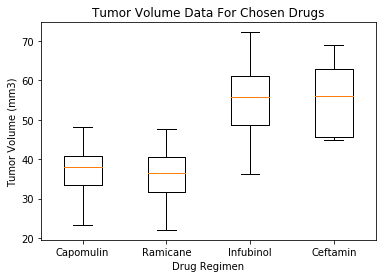

In [157]:
#adding the above list data into a variable.
data = [cap_data,ram_data,inf_data,cef_data]

#boxplotting tumor volume data for selected drug regimens
fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume Data For Chosen Drugs')

ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],showfliers=True)

plt.show()

## Line and scatter plots

<function matplotlib.pyplot.show(*args, **kw)>

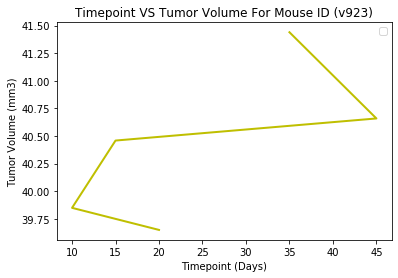

In [176]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#choosing a mouse ID to generate the line plot. 
cap_line_plot = capomulin_tumor_data.loc[capomulin_tumor_data["Mouse ID"]=="v923"]

#defining x and y axis points and generating a line plot.
x_axis= cap_line_plot["Timepoint"]
y_axis =cap_line_plot["Tumor Volume (mm3)"]

plt.title("Timepoint VS Tumor Volume For Mouse ID (v923)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend("Mouse ID")
plt.plot(x_axis,y_axis,color='y',linewidth =2)
plt.show

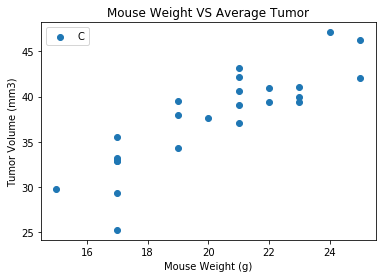

In [163]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#grouping my mouse ID to calculate the average.

cap_avg_tumor = capomulin_tumor_data.groupby(["Mouse ID"]).mean()

#generating the scatter plot for weight vs avg tumor volume. 
plt.scatter(cap_avg_tumor["Weight (g)"],cap_avg_tumor["Tumor Volume (mm3)"] )
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend("Capomulin")
plt.title("Mouse Weight VS Average Tumor")
plt.show()

In [172]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = cap_avg_tumor["Weight (g)"]
tumoraverage = cap_avg_tumor["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight, tumoraverage)
print(f"The correlation between weight and tumor average is {round(correlation[0],2)}")


The correlation between weight and tumor average is 0.87


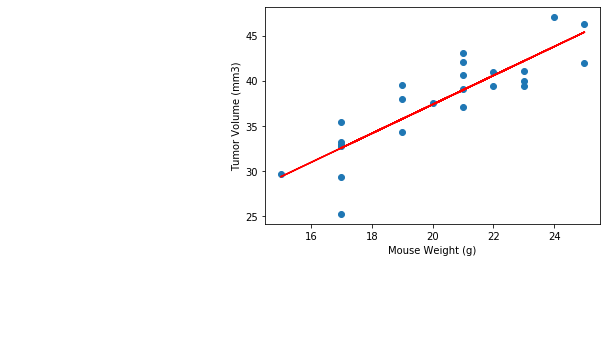

<Figure size 1080x1080 with 0 Axes>

In [171]:
#linear regression calculations generated scatter plot generated for the mouse weight to tumor volume. 

x_values = cap_avg_tumor["Weight (g)"]
y_values = cap_avg_tumor["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=5,color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.figure(figsize=(15,15))
plt.show()